<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions

*Author: Alexander Del Toro Barba*

## Summary

**Summary**
* Use ReLU. Be careful with your learning rates
* Try out Leaky ReLU / Maxout / ELU
* Try out tanh but don’t expect much
* Don’t use sigmoid


**Activation Functions - Key Points**
* Reside within neurons
* Transform input values into acceptable and useful range
* Allow pass-through of values which are useful in subsequent layers of neurons
* Default hidden layer activation function is ReLU
* Sigmoid only for binary classification output layer

Additional Sources: [kdnuggets](https://www.kdnuggets.com/2017/09/neural-network-foundations-explained-activation-function.html) & [exxactcorp](https://blog.exxactcorp.com/activation-functions-and-optimizers-for-deep-learning-models/)


![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_3.png)

![Optimizer](https://raw.githubusercontent.com/deltorobarba/repo/master/optimizer_1.png)

Source: [Stanford.edu](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning)

# Activation Functions

In [14]:
# Populating the interactive namespace from numpy and matplotlib
%pylab inline

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 4)})

Populating the interactive namespace from numpy and matplotlib


https://towardsdatascience.com/the-mathematics-of-optimization-for-deep-learning-11af2b1fda30

https://adl1995.github.io/an-overview-of-activation-functions-used-in-neural-networks.html


https://github.com/adl1995/adl1995.github.io/blob/master/notebooks/Activation%20functions.ipynb


## Binary Step

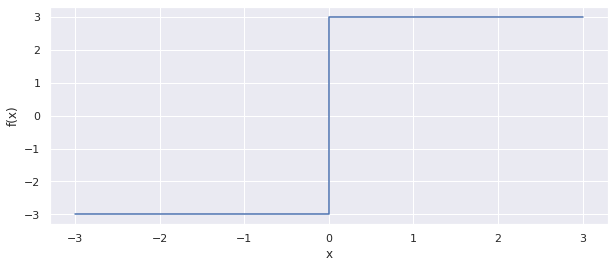

In [38]:
x = [-3, -2, -1, 0, 1, 2, 3]
y = [-3, -3, -3, -3, 3, 3, 3]
# y = [2, 2, 2, 2, 2.9, 2.9, 2.9]
plt.xlabel('x'), plt.ylabel('f(x)')
plt.step(x, y)

## tanh

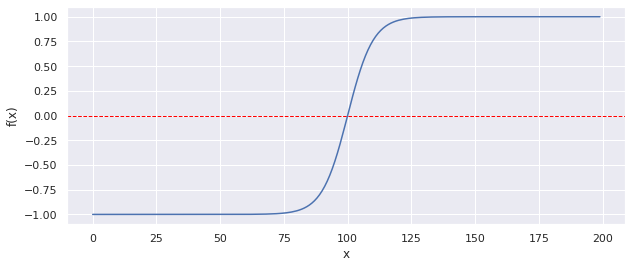

In [35]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.plot(np.tanh(x))

$g(z)=\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$

* LeCun et al., 1991
* Squashes numbers to range [-1,1]
* zero centered (nice)
* The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
* The function is differentiable.
* The function is monotonic while its derivative is not monotonic.
* The tanh function is mainly used classification between two classes.
* still kills gradients when saturated




## Sigmoid (Logistic Regression)

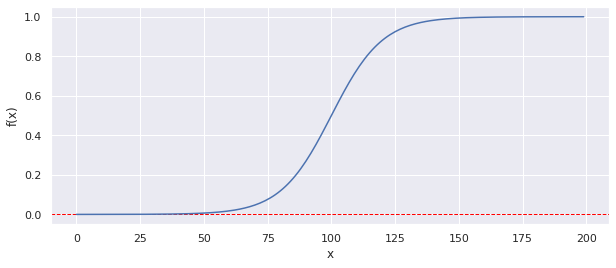

In [33]:
x = np.arange(-10, 10, 0.1)
plt.xlabel('x'), plt.ylabel('f(x)')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.0);
plt.plot(1 / (1 + np.exp(-x)))

$g(z)=\frac{1}{1+e^{-z}}$

<br> 
**Characteristics**
* Logistic regression. Squashes numbers to range [0,1]
* Sigmoid activation derived from mean field solution of Boltzmann machine
* Softmax function is a more generalized logistic activation function which is used for multiclass classification.

**Advantages**
* Historically popular since they have nice interpretation as a saturating “firing rate” of a neuron.
* The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
* Especially used for models where we have to predict the probability as an output.
* Sigmoid works well for a classifier: approximating a classifier function as combinations of sigmoid is easier than maybe ReLu, for example. Which will lead to faster training process and convergence

**Disadvantages**
* Saturated neurons “kill” the gradients (look at x= -10, 0 and 10). Can cause the neural network to get stuck during training. If a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks usethe feed-forward activations to calculate parameter gradients, this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state.
* Sigmoid outputs are not zero-centered. Mean not at zero anymore. Consider what happens when the input to a neuron (x) is always positive. What can we say about the gradients on w? They are always all positive or all negative (and run zig-zag)! (this is also why you want zero-mean data!)
* exp() is a bit compute expensive. Learning time longer.
* The function is monotonic but function’s derivative is not.





---


## ReLU

$g(z)=\max (0, z)$

<br>

**Characteristics**
* Krizhevsky et al., 2012
* rectified linear units, faster and more efficient, since fewer neurons are activated (less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations). 
* No gradient vanishing problem, as Relu’s gradient is constant = 1. Sparsity: since output 0 for negative values of x! When W*x < 0, Relu gives 0, which means sparsity. Less calculation load. This may be least important. 
* However, ReLu may amplify the signal inside the network more than softmax and sigmoid. 
* But: dying ReLU problem for values zero and smaller: neurons will never reactivated. Solution: leaky ReLU, noisy ReLU (in RBMs) and ELU (exponential linear units)
* ReLU as the activation function for hidden layers and sigmoid for the output layer (these are standards, didn’t experiment much on changing these). Also, I used the standard categorical cross-entropy loss.

**Advantages**
* Does not saturate (in +region)
* Very computationally efficient
* Converges much faster than sigmoid/tanh in practice (e.g. 6x)
Actually more biologically plausible than sigmoid

**Disadvantages**
* Not zero-centered output
* An annoyance: what is the gradient when x < 0? What happens when x = -10, 0 or 10?
* People like to initialize ReLU neurons with slightly positive biases (e.g. 0.01)



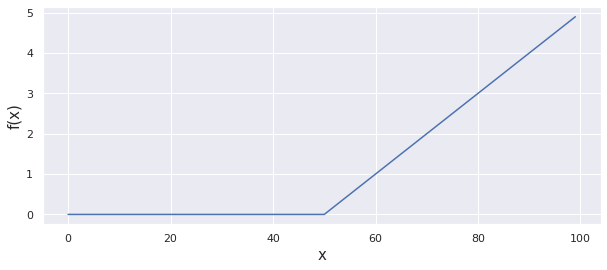

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
plt.plot(np.maximum(0, x))
plt.grid(True)
plt.xlabel('x', fontsize=15)
plt.ylabel('f(x)', fontsize=15)
plt.savefig('relu.svg', format='svg')



---


## Leaky ReLU

$\begin{aligned}
g(z) &=\max (\epsilon z, z) \\
& \text { with } \epsilon \ll 1
\end{aligned}$

* Mass et al., 2013 and He et al., 2015
* Does not saturate
* Computationally efficient
* Converges much faster than sigmoid/tanh in practice! (e.g. 6x) will not “die”.




---


## ELU

* Exponential Linear Units
* Clevert et al., 2015
* All benefits of ReLU
* Closer to zero mean outputs
* Negative saturation regime compared with Leaky ReLU adds some robustness to noise 
* But Computation requires exp()




---


## SELU

* scaled exponential linear units
* instead of normalizing the output of the activation function — the activation function suggested (SELU — scaled exponential linear units) outputs normalized values. https://towardsdatascience.com/selu-make-fnns-great-again-snn-8d61526802a9
* Background: batchnormalization for feedfirward networks: Training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change. This slows down the training by requiring lower learning rates and careful parameter initialization, and makes it notoriously hard to train models with saturating nonlinearities. (https://arxiv.org/abs/1502.03167)
* Negative values sometimes: Scaling the function is the mechanism by which the authors accomplish the goal (of self-normalizing properties). As a byproduct, they sometimes output negative values, but there's no hidden meaning in it. It just makes the math work out. 
* **SELU vs RELU**: https://www.hardikp.com/2017/07/24/SELU-vs-RELU/



---


## Softmax

* is an activation function that is not function of a single fold x from the previous layer or layers.
* usually used in the last layer
* Softmax Regression (synonyms: Multinomial Logistic, Maximum Entropy Classifier, or just Multi-class Logistic Regression) 
* is a generalization of logistic regression that we can use for multi-class classification (under the assumption that the classes are mutually exclusive). We use the (standard) Logistic Regression model in binary classification tasks. in softmax regression (SMR), we replace the sigmoid logistic function by the so-called€softmax function€φ



---


## Maxout

* is an activation function that is not function of a single fold x from the previous layer or layers.



---


## List of Activation Functions

Comparison of Activation Functions:
[Wikipedia](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions)

* Activation functions can be defined as [layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)

* Activation functions can be defined as [activation](https://www.tensorflow.org/api_docs/python/tf/keras/activations/elu)

# RNN Model

## Import & Prepare Data

In [0]:
import tensorflow as tf
import datetime, os

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Select Activation Function

**ReLU**

In [0]:
activation = tf.keras.layers.ReLU(max_value=None,
                                 negative_slope=0,
                                 threshold=0)

**Leaky ReLU**

In [0]:
activation = tf.keras.layers.LeakyReLU(alpha=0.3)

In [0]:
activation = 'relu'
# activation = 'linear'
# activation = 'sigmoid'
# activation = 'tanh'
# activation = 'softmax'

## Build Model & Run

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation=activation))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5196 - acc: 0.8160 - val_loss: 0.5009 - val_acc: 0.8133
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4265 - acc: 0.8473 - val_loss: 0.4078 - val_acc: 0.8561
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3972 - acc: 0.8574 - val_loss: 0.4877 - val_acc: 0.8323
Epoch 4/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3827 - acc: 0.8609 - val_loss: 0.3928 - val_acc: 0.8608
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3700 - acc: 0.8682 - val_loss: 0.4022 - val_acc: 0.8598
